In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import lightgbm as lgb
from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier
from xgboost import XGBRegressor

import optuna 
from optuna import Trial
from optuna.samplers import TPESampler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
X = pd.read_csv("/content/drive/MyDrive/X.csv")
y = pd.read_csv("/content/drive/MyDrive/y.csv")

In [5]:
X

,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Lube Oil Tank Temperature,Motor Current Phase A,Motor Voltage,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1
0,1292.358276,303325.5625,304403.8125,76.793610,147.000000,4235.593262,137.116119,144.290588,3589.286377,24.972260,16.881464,0.274836,226.737091,98.086472
1,1280.951782,303501.2188,306518.3438,75.740501,147.000000,4237.000000,137.001038,144.234497,3589.314209,24.914534,16.850445,0.291397,226.697098,98.296577
2,1301.558716,303439.5625,304557.9375,76.408760,146.000000,4230.842773,136.933716,144.201675,3589.330566,25.057545,16.832302,0.267696,226.673706,98.419472
3,1277.910767,303409.8125,305721.0313,76.574921,145.693817,4243.306152,136.920685,144.195328,3589.333740,25.000223,16.828791,0.264931,226.669174,98.443253
4,1291.603882,303493.1250,303782.2188,77.575714,147.308044,4233.544922,136.807770,144.140289,3589.361084,24.901915,16.822590,0.274948,226.629944,98.862801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651161,1293.979736,326214.5313,330215.0625,61.879475,157.523743,4232.139648,132.758225,139.821976,3590.093994,24.894312,17.111792,0.425015,227.783203,90.908470
2651162,1294.327148,324865.8750,330292.5625,61.872574,158.000000,4229.079590,132.757156,139.821930,3590.093018,24.921499,17.160374,0.401521,227.784195,90.908981
2651163,1294.674438,325110.4063,330050.1250,61.865669,157.013412,4232.669922,132.756088,139.821899,3590.091797,24.993546,17.208954,0.403385,227.785187,90.909485
2651164,1289.419434,326298.6250,330165.6563,61.858768,157.496246,4231.138672,132.755020,139.821854,3590.090820,25.065592,17.257536,0.405250,227.786179,90.909996


In [6]:
y

,Pump Radial Bearing Vibration
0,9.771034
1,9.445200
2,9.469283
3,9.759820
4,9.620083
...,...
2651161,8.381781
2651162,8.038453
2651163,8.038453
2651164,7.992675


In [7]:
# Taking a subset of the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.15,test_size=0.45 ,random_state=42)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(397674, 14) (397674, 1)
(1193025, 14) (1193025, 1)


In [8]:
y_train

,Pump Radial Bearing Vibration
1358647,10.986254
1767451,7.572716
1326288,9.647627
2143398,7.411307
471877,8.766308
...,...
2626765,7.560852
240199,8.244419
1541918,9.232836
10433,9.321617


In [9]:
df_train = pd.concat([X_train, y_train], axis=1)

In [10]:
df_train

,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Lube Oil Tank Temperature,Motor Current Phase A,Motor Voltage,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Radial Bearing Vibration
1358647,1293.981445,331732.1875,330091.8125,76.111389,152.015595,4250.859863,137.501175,141.992584,3588.998291,24.835285,16.822950,0.350176,227.265289,95.268967,10.986254
1767451,1315.078003,322607.2188,328601.0313,90.428558,148.000000,4226.037598,145.429337,148.074799,3588.998291,24.910381,17.055449,0.313969,226.863144,108.066200,7.572716
1326288,1299.975342,325878.3438,332091.7500,91.860031,158.000000,4237.976074,144.544815,148.572678,3589.163086,24.640053,16.687429,0.410495,227.042984,108.320724,9.647627
2143398,1298.281128,327856.2500,333840.3125,105.256882,151.070160,4232.862305,150.642563,153.261978,3588.938232,24.534552,16.965401,0.343123,227.268631,117.716652,7.411307
471877,1299.693970,314895.8125,314479.5000,82.663872,148.666336,4249.330566,140.083679,146.863693,3589.990234,24.430353,16.750458,0.293172,226.993057,104.007736,8.766308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626765,1283.988770,326727.4063,330662.9063,57.529030,152.021545,4240.042969,130.844849,139.155792,3590.981934,24.173376,16.686386,0.331439,227.919983,87.499603,7.560852
240199,1303.988525,333570.9375,341208.8438,85.528404,155.000000,4241.653809,144.104248,148.395371,3587.429932,24.877314,17.128284,0.361063,227.759689,106.957535,8.244419
1541918,1299.180908,326455.7813,328473.5938,81.823669,148.968826,4231.155762,140.236450,146.207153,3589.990234,24.782551,16.917738,0.297406,227.227799,102.048668,9.232836
10433,1306.292114,304447.7188,304937.0313,83.711479,148.000000,4238.000000,138.880524,146.034210,3589.542725,24.943062,16.866812,0.304668,227.080109,102.721939,9.321617


In [11]:
df_test = pd.concat([X_test, y_test], axis=1)

In [12]:
df_test

,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Lube Oil Tank Temperature,Motor Current Phase A,Motor Voltage,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Radial Bearing Vibration
1274267,1300.229858,325558.4375,319111.8750,53.050613,152.000000,4260.000000,131.023758,139.469681,3588.998291,24.676842,16.935919,0.313320,227.566483,84.628426,10.739483
2004756,1302.531738,323461.4063,328801.1875,96.963280,148.963165,4251.035156,148.060776,149.854782,3589.547607,24.808134,16.829840,0.310369,226.993057,111.628670,7.507439
621605,1305.518188,314299.2813,318621.1875,87.668320,150.000000,4240.643066,143.212036,150.054031,3588.998291,24.304108,16.755207,0.305973,227.041092,110.171783,9.590296
2301321,1287.238159,329205.8438,331476.3438,91.556953,153.348114,4234.551270,145.273697,149.051407,3589.957031,24.312567,16.643591,0.387564,226.665924,110.934112,7.846189
2599868,1313.063721,330272.9688,334823.3125,60.042702,152.017166,4237.827637,129.725708,139.322174,3590.981934,24.587883,16.656597,0.347204,227.704987,90.597229,8.139162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100846,1296.412598,322425.9375,324213.2500,67.270393,153.956558,4244.173828,135.268066,145.378342,3588.998291,24.447697,16.697689,0.362598,227.818710,91.004196,9.738651
304298,1301.230103,332763.9375,335655.4375,78.115173,158.284378,4237.284180,139.994980,144.890106,3588.998291,24.548109,16.642611,0.404112,226.932236,100.368141,8.621591
2369628,1298.515747,329942.9688,334712.4375,86.286652,152.000000,4233.684570,141.404724,146.312470,3589.920410,24.507437,16.807343,0.371609,227.150162,106.200829,8.011325
2404285,1283.329102,327058.4375,331994.0938,102.693230,151.357391,4233.714844,147.804016,152.481369,3588.998291,24.579802,16.980774,0.362979,226.883041,117.142830,8.139162


## Using a linear regression model with K fold as our baseline

In [13]:
#Scaling the test data to make it more normalized for traditional regression model
scaler = MinMaxScaler()
X_trains = scaler.fit_transform(X_train)
X_tests = scaler.fit_transform(X_test)
y_trains = scaler.fit_transform(y_train)
y_tests = scaler.fit_transform(y_test)

In [14]:
lm = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_trains, y_trains, scoring='r2', cv=folds)
scores

array([0.63394031, 0.63571801, 0.63544668, 0.63451176, 0.63312999])

## Ulen(X_train.columns)sing Hyperparameter Tuning Using Grid Search Cross-Validation

In [15]:
len(X_train.columns)

14

In [16]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 15))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_trains, y_trains)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_trains, y_trains)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14]}],
             return_train_score=True, scoring='r2', verbose=1)

In [17]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.665476,0.620261,0.006601,0.000724,1,{'n_features_to_select': 1},0.378169,0.377310,0.380278,0.382356,...,0.378854,0.002210,14,0.379034,0.379249,0.378507,0.377984,0.379534,0.378862,0.000553
1,3.218538,0.317567,0.010549,0.002216,2,{'n_features_to_select': 2},0.496249,0.494932,0.496926,0.496297,...,0.495053,0.002194,13,0.494768,0.495097,0.494600,0.494755,0.496110,0.495066,0.000547
2,2.892226,0.214996,0.019014,0.007904,3,{'n_features_to_select': 3},0.552660,0.553724,0.554139,0.554012,...,0.553324,0.000809,12,0.553502,0.553236,0.553132,0.553163,0.553643,0.553335,0.000202
3,1.658005,0.170378,0.008121,0.000960,4,{'n_features_to_select': 4},0.584740,0.584952,0.586276,0.585196,...,0.584781,0.001149,11,0.584804,0.584751,0.584420,0.584689,0.585300,0.584793,0.000286
4,1.532171,0.148649,0.008498,0.001008,5,{'n_features_to_select': 5},0.607282,0.608302,0.608335,0.608482,...,0.607597,0.001093,10,0.607690,0.607435,0.607426,0.607389,0.608111,0.607610,0.000272
5,1.509616,0.075768,0.009457,0.000946,6,{'n_features_to_select': 6},0.619993,0.620729,0.622081,0.620274,...,0.620475,0.000928,9,0.620614,0.620429,0.620090,0.620542,0.620785,0.620492,0.000232
6,1.415537,0.165083,0.010956,0.001069,7,{'n_features_to_select': 7},0.628101,0.629880,0.629464,0.628308,...,0.628646,0.000892,8,0.628807,0.628358,0.628462,0.628753,0.628960,0.628668,0.000224
7,1.289796,0.163502,0.011752,0.000685,8,{'n_features_to_select': 8},0.628940,0.630728,0.630322,0.629248,...,0.629468,0.000950,7,0.629628,0.629177,0.629279,0.629548,0.629833,0.629493,0.000238
8,1.141937,0.106388,0.013051,0.003515,9,{'n_features_to_select': 9},0.630811,0.632705,0.632166,0.631524,...,0.631482,0.000900,6,0.631680,0.631203,0.631337,0.631498,0.631827,0.631509,0.000225
9,0.991566,0.116709,0.013061,0.001714,10,{'n_features_to_select': 10},0.633322,0.632675,0.632231,0.631565,...,0.632003,0.001059,5,0.634257,0.631261,0.631373,0.631540,0.631875,0.632061,0.001117


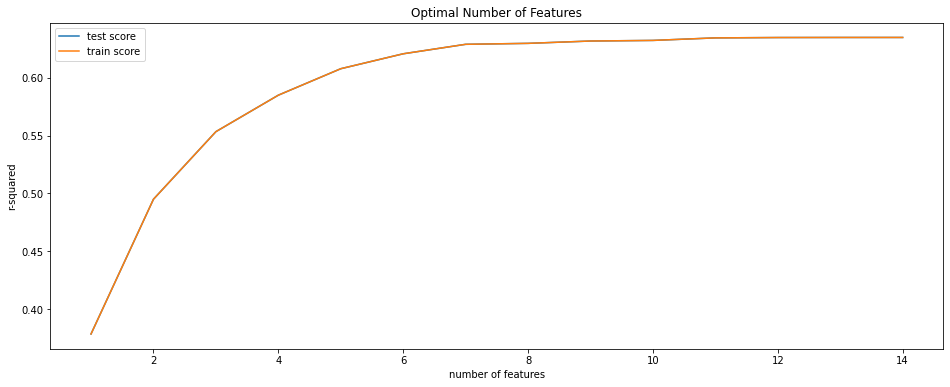

In [18]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

### GridCV isn't able to do feature selection at all
#### Lets make use of the first 11 features to predict

In [19]:
import sklearn.metrics as metrics
n_features_optimal = 11

lm = LinearRegression()
lm.fit(X_trains, y_trains)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_trains, y_trains)

# predict prices of X_test
y_pred = lm.predict(X_tests)
r2 = metrics.r2_score(y_tests, y_pred)
print(r2)

0.6328236830179901


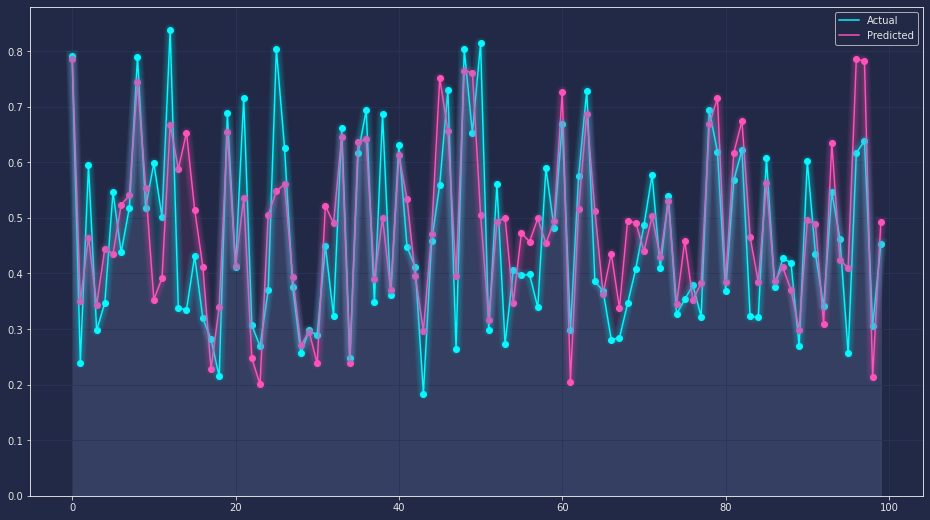

In [35]:
# plot
plt.style.use("dark_background")

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey

colors = [
    '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#F5D300',  # yellow
    '#00ff41',  # matrix green
]


df = pd.DataFrame({'Actual': y_tests[:100].flatten(),
                   'Predicted': y_pred[:100].flatten()})

fig, ax = plt.subplots()

df.plot(marker='o', color=colors, ax=ax)

# Redraw the data with low alpha and slighty increased linewidth:
n_shades = 10
diff_linewidth = 1.05
alpha_value = 0.3 / n_shades

for n in range(1, n_shades+1):

    df.plot(marker='o',
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax,
            color=colors)

# Color the areas below the lines:
for column, color in zip(df, colors):
    ax.fill_between(x=df.index,
                    y1=df[column].values,
                    y2=[0] * len(df),
                    color=color,
                    alpha=0.1)

ax.grid(color='#2A3459')

ax.set_xlim([ax.get_xlim()[0] - 0.2, ax.get_xlim()[1] + 0.2])  # to not have the markers cut off
ax.set_ylim(0)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

### The results from this model werent bad but they werent good either

## Tree Based Models 

#### These models are guaranteed to give better results than the traditional linear regression because they are in turn resilient to multimodal data

In [21]:
# config
train_mode = False
target = 'Pump Radial Bearing Vibration'
random_state = 42
x_cols = [c for c in df_train.columns if 'Pump Radial Bearing Vibration' not in c] # all training columns

In [22]:
x_cols

['Auxiliary Boilers Feed Water Header Pressure',
 'Heat Recovery System Header Mass Flow',
 'Heat Recovery System Header Mass Flow.1',
 'Lube Oil Tank Temperature',
 'Motor Current Phase A',
 'Motor Voltage',
 'Pump Journal 1 Bearing Temperature',
 'Pump Journal 2 Bearing Temperature',
 'Pump Shaft Speed',
 'Pump Suction Pressure 1',
 'Pump Suction Pressure 2',
 'Pump Suction Strainer Differential Pressure',
 'Pump Suction Temperature',
 'Pump Thrust Bearing Temperature 1']

In [23]:
# evaluation function
def _evaluate(model, x_cols, df, target=target, n_folds=5):
    
    oof = np.zeros(len(df[target])) # means 'out of fold' - basically where we are going to store our test fold predictions
    preds_test = np.zeros(len(df_test)) # test set predictions

    # enum folds
    kf = KFold(n_splits=n_folds, random_state=random_state, shuffle=True)
    for idx_train, idx_test in kf.split(df):

        # setup test / train data
        x_train = df.loc[idx_train, x_cols].values
        y_train = df.loc[idx_train, target].values
        x_test = df.loc[idx_test, x_cols].values
        y_test = df.loc[idx_test, target].values
    
        # fit / predict
        model.fit(x_train, y_train)#, eval_set = [(x_test, y_test)], early_stopping_rounds=100, verbose=False)
        preds_train = model.predict(x_test) # train set predictions (used for hypertuning)
        preds_test += model.predict(df_test[x_cols].values) / n_folds
        
        # append train predictions
        oof[idx_test] = preds_train
    
    return oof, preds_test

In [24]:
df_train

,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Lube Oil Tank Temperature,Motor Current Phase A,Motor Voltage,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Radial Bearing Vibration
1358647,1293.981445,331732.1875,330091.8125,76.111389,152.015595,4250.859863,137.501175,141.992584,3588.998291,24.835285,16.822950,0.350176,227.265289,95.268967,10.986254
1767451,1315.078003,322607.2188,328601.0313,90.428558,148.000000,4226.037598,145.429337,148.074799,3588.998291,24.910381,17.055449,0.313969,226.863144,108.066200,7.572716
1326288,1299.975342,325878.3438,332091.7500,91.860031,158.000000,4237.976074,144.544815,148.572678,3589.163086,24.640053,16.687429,0.410495,227.042984,108.320724,9.647627
2143398,1298.281128,327856.2500,333840.3125,105.256882,151.070160,4232.862305,150.642563,153.261978,3588.938232,24.534552,16.965401,0.343123,227.268631,117.716652,7.411307
471877,1299.693970,314895.8125,314479.5000,82.663872,148.666336,4249.330566,140.083679,146.863693,3589.990234,24.430353,16.750458,0.293172,226.993057,104.007736,8.766308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626765,1283.988770,326727.4063,330662.9063,57.529030,152.021545,4240.042969,130.844849,139.155792,3590.981934,24.173376,16.686386,0.331439,227.919983,87.499603,7.560852
240199,1303.988525,333570.9375,341208.8438,85.528404,155.000000,4241.653809,144.104248,148.395371,3587.429932,24.877314,17.128284,0.361063,227.759689,106.957535,8.244419
1541918,1299.180908,326455.7813,328473.5938,81.823669,148.968826,4231.155762,140.236450,146.207153,3589.990234,24.782551,16.917738,0.297406,227.227799,102.048668,9.232836
10433,1306.292114,304447.7188,304937.0313,83.711479,148.000000,4238.000000,138.880524,146.034210,3589.542725,24.943062,16.866812,0.304668,227.080109,102.721939,9.321617


In [25]:
df_train.reset_index(drop=True, inplace=True)

In [26]:
df_train

,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Lube Oil Tank Temperature,Motor Current Phase A,Motor Voltage,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Radial Bearing Vibration
0,1293.981445,331732.1875,330091.8125,76.111389,152.015595,4250.859863,137.501175,141.992584,3588.998291,24.835285,16.822950,0.350176,227.265289,95.268967,10.986254
1,1315.078003,322607.2188,328601.0313,90.428558,148.000000,4226.037598,145.429337,148.074799,3588.998291,24.910381,17.055449,0.313969,226.863144,108.066200,7.572716
2,1299.975342,325878.3438,332091.7500,91.860031,158.000000,4237.976074,144.544815,148.572678,3589.163086,24.640053,16.687429,0.410495,227.042984,108.320724,9.647627
3,1298.281128,327856.2500,333840.3125,105.256882,151.070160,4232.862305,150.642563,153.261978,3588.938232,24.534552,16.965401,0.343123,227.268631,117.716652,7.411307
4,1299.693970,314895.8125,314479.5000,82.663872,148.666336,4249.330566,140.083679,146.863693,3589.990234,24.430353,16.750458,0.293172,226.993057,104.007736,8.766308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397669,1283.988770,326727.4063,330662.9063,57.529030,152.021545,4240.042969,130.844849,139.155792,3590.981934,24.173376,16.686386,0.331439,227.919983,87.499603,7.560852
397670,1303.988525,333570.9375,341208.8438,85.528404,155.000000,4241.653809,144.104248,148.395371,3587.429932,24.877314,17.128284,0.361063,227.759689,106.957535,8.244419
397671,1299.180908,326455.7813,328473.5938,81.823669,148.968826,4231.155762,140.236450,146.207153,3589.990234,24.782551,16.917738,0.297406,227.227799,102.048668,9.232836
397672,1306.292114,304447.7188,304937.0313,83.711479,148.000000,4238.000000,138.880524,146.034210,3589.542725,24.943062,16.866812,0.304668,227.080109,102.721939,9.321617


In [27]:
df_test.reset_index(drop=True, inplace=True)

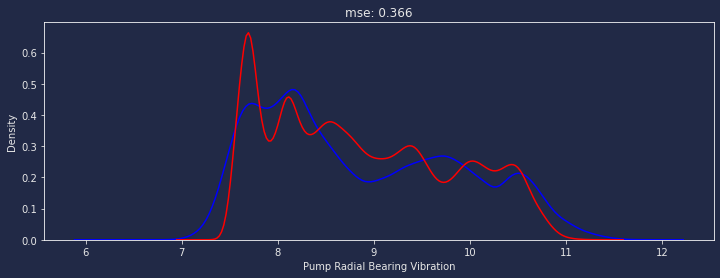

In [28]:
# get baseline score
lgbm = LGBMRegressor(seed=random_state)
oof, preds_test = _evaluate(lgbm, x_cols, df_train)

# plot
fig, ax = plt.subplots(figsize=(12, 4))
sns.kdeplot(df_train[target], color='b', label='actual')
sns.kdeplot(oof, color='r', label='prediction')
ax.set_title('mse: ' + str(round(mean_squared_error(df_train[target], oof, squared=False), 5)))
plt.show()

In [29]:
# config
train_mode = True
target = 'Pump Radial Bearing Vibration'
random_state = 42
x_cols = [c for c in df_train.columns if 'Pump Radial Bearing Vibration' not in c] # all training columns

In [32]:
# lgbm / objective function
def objective(trial):
    
    # hyperparameters
    param = {
        'boosting_type':'gbdt',
        'num_leaves':trial.suggest_int('num_leaves', 3, 150),
        'max_depth':trial.suggest_int('max_depth', -1, 20),
        'learning_rate':trial.suggest_float('learning_rate', 0.001, 0.6),
        'n_estimators':trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight':trial.suggest_float('min_child_weight', 0.2, 0.6),
        'min_child_samples':trial.suggest_int('min_child_samples', 15, 30),
        'subsample':trial.suggest_float('subsample', 0.5, 1.0),
        'subsample_freq':trial.suggest_int('subsample_freq', 3, 150),
        'random_state':random_state,
        'lambda_l1':trial.suggest_float('lambda_l1', 0.0, 5.0)
    }
    
    # model / evaluate
    lgbm = LGBMRegressor(**param) # model
    x_cols = [c for c in df_train.columns if 'Pump Radial Bearing Vibration' not in c] # all columns
    oof, preds_test = _evaluate(lgbm, x_cols, df_train.reset_index(drop=True)) # evaluate
    
    return mean_squared_error(df_train[target].reset_index(drop=True), oof, squared=False)

if train_mode:

    # run study
    study = optuna.create_study(direction='minimize', sampler=TPESampler())
    study.optimize(objective, n_trials=200)

    # output study
    print (study.best_value)
    print (study.best_params)

[I 2022-08-01 15:36:21,654] A new study created in memory with name: no-name-1a4bb273-af2b-44ff-8460-d9865891aa24
[I 2022-08-01 15:39:39,239] Trial 0 finished with value: 0.22784076616503246 and parameters: {'num_leaves': 129, 'max_depth': 11, 'learning_rate': 0.356480393828691, 'n_estimators': 326, 'min_child_weight': 0.21839580493658867, 'min_child_samples': 16, 'subsample': 0.927317429756019, 'subsample_freq': 79, 'lambda_l1': 2.7075056138508513}. Best is trial 0 with value: 0.22784076616503246.
[I 2022-08-01 15:41:36,634] Trial 1 finished with value: 0.3292686888694776 and parameters: {'num_leaves': 9, 'max_depth': 6, 'learning_rate': 0.25242218223285545, 'n_estimators': 424, 'min_child_weight': 0.3877131321594915, 'min_child_samples': 17, 'subsample': 0.8187317961455649, 'subsample_freq': 146, 'lambda_l1': 2.9132968580989074}. Best is trial 0 with value: 0.22784076616503246.
[I 2022-08-01 15:42:42,790] Trial 2 finished with value: 0.2654544015060869 and parameters: {'num_leaves': 

KeyboardInterrupt: ignored

In [33]:
# xgb / objective function
def objective(trial):
    
    # hyperparameters
    param = {
        'random_state':random_state,
        'objective':'reg:squarederror',
        'booster':'gbtree',
        'learning_rate':trial.suggest_float('learning_rate', 0.001, 0.1),
        'alpha':trial.suggest_float('alpha', 0.001, 0.1),
        'colsample_bylevel':trial.suggest_float('colsample_bylevel', 0.05, 0.1),
        'colsample_bytree':trial.suggest_float('colsample_bytree', 0.1, 0.9),
        'gamma':trial.suggest_float('gamma', 0, 0.5),
        'max_depth':trial.suggest_int('max_depth', 3, 18),
        'min_child_weight': trial.suggest_float ('min_child_weight', 1, 20),
        #'reg_lambda':trial.suggest_int('reg_lambda', 0, 10),
        #'reg_alpha':trial.suggest_int('reg_alpha', 10, 50),
        'subsample':trial.suggest_float('subsample', 0.3, 0.7),
    }
    
    # model / evaluate
    xgb = XGBRegressor(**param) # model
    x_cols = [c for c in df_train.columns if 'Pump Radial Bearing Vibration' not in c] # all columns
    oof, preds_test = _evaluate(xgb, x_cols, df_train, target=target) # evaluate
    
    return mean_squared_error(df_train[target], oof, squared=False)

if train_mode:
    
    # run study
    study = optuna.create_study(direction='minimize', sampler=TPESampler())
    study.optimize(objective, n_trials=100)

    # output study
    print (study.best_value)
    print (study.best_params)

[I 2022-08-01 15:47:01,799] A new study created in memory with name: no-name-7d7f244c-b618-4d58-83c9-81fd37dad90d
[I 2022-08-01 15:54:20,532] Trial 0 finished with value: 0.6519953207006545 and parameters: {'learning_rate': 0.08113781457839542, 'alpha': 0.010351838969385928, 'colsample_bylevel': 0.07804303537636931, 'colsample_bytree': 0.13285218945618357, 'gamma': 0.11468328633521496, 'max_depth': 17, 'min_child_weight': 6.147723825731111, 'subsample': 0.5839095598966222}. Best is trial 0 with value: 0.6519953207006545.
[I 2022-08-01 16:01:44,940] Trial 1 finished with value: 0.34230571408115934 and parameters: {'learning_rate': 0.06789951823039851, 'alpha': 0.08236640637333782, 'colsample_bylevel': 0.06467187225106075, 'colsample_bytree': 0.30435009699206783, 'gamma': 0.028666887829257304, 'max_depth': 15, 'min_child_weight': 1.732084682441872, 'subsample': 0.5968409524485323}. Best is trial 1 with value: 0.34230571408115934.
[I 2022-08-01 16:04:02,599] Trial 2 finished with value: 2

KeyboardInterrupt: ignored

In [34]:
# hyper params per each model
param_lgbm = {'num_leaves': 129, 'max_depth': 11, 'learning_rate': 0.356480393828691, 'n_estimators': 326, 'min_child_weight': 0.21839580493658867, 'min_child_samples': 16, 'subsample': 0.927317429756019, 'subsample_freq': 79, 'lambda_l1': 2.7075056138508513}
param_xgb = param_xgb = {'learning_rate': 0.06789951823039851, 'alpha': 0.08236640637333782, 'colsample_bylevel': 0.06467187225106075, 'colsample_bytree': 0.30435009699206783, 'gamma': 0.028666887829257304, 'max_depth': 15, 'min_child_weight': 1.732084682441872, 'subsample': 0.5968409524485323}

# lgbm hyperopt score
lgbm = LGBMRegressor(seed=random_state, **param_lgbm)
oof_lgbm, preds_lgbm = _evaluate(lgbm, x_cols, df_train, n_folds=5)
print ('hyper lgbm:', mean_squared_error(df_train[target], oof_lgbm, squared=False))

# xgb score
xgb = XGBRegressor(random_state=random_state, **param_xgb)
oof_xgb, preds_xgb = _evaluate(xgb, x_cols, df_train, n_folds=2) # scaled back so it runs quicker for public.
print ('hyper xgb:', mean_squared_error(df_train[target], oof, squared=False))

hyper lgbm: 0.22775316823587868
[16:25:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:27:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
hyper xgb: 0.3659976005608779


# Our Hypertuned tree regressors perform way better than traditional linear regressor, lets save these models

In [36]:
import pickle
pickle.dump(lm,open('/content/drive/MyDrive/LinearRegression.pkl','wb'))

In [37]:
pickle.dump(lgbm,open('/content/drive/MyDrive/LGBMRegression.pkl','wb'))
pickle.dump(xgb,open('/content/drive/MyDrive/XGBRegression.pkl','wb'))

In [39]:
x_cols

['Auxiliary Boilers Feed Water Header Pressure',
 'Heat Recovery System Header Mass Flow',
 'Heat Recovery System Header Mass Flow.1',
 'Lube Oil Tank Temperature',
 'Motor Current Phase A',
 'Motor Voltage',
 'Pump Journal 1 Bearing Temperature',
 'Pump Journal 2 Bearing Temperature',
 'Pump Shaft Speed',
 'Pump Suction Pressure 1',
 'Pump Suction Pressure 2',
 'Pump Suction Strainer Differential Pressure',
 'Pump Suction Temperature',
 'Pump Thrust Bearing Temperature 1']

In [40]:
def save_to_file(text):

    with open('/content/drive/MyDrive/SelectedFeatures.txt', mode='wt', encoding='utf-8') as myfile:
        myfile.write('\n'.join(text))
        myfile.write('\n')

In [41]:
save_to_file(x_cols)

We will use these to make the predictor script